In [1]:
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=""

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=""


In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
module_path = os.path.abspath(os.path.join('../src'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = ""

In [3]:
from src import train, generate, eval
#from runfiles import train, generate, eval
from modules.config import read_config
import modules.plots as plots
from modules.datageneration import load_data, data_functions
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
import pyro
import pyro.poutine as poutine

import dill
import multiprocessing

In [4]:
BASE_DIR = "../tests/sanity_check_mcmc"
PROFILE = "tyxe-test-mcmc"

#BASE_DIR = "./tests/x-dim-test"
#PROFILE = "test"

In [5]:
[torch.cuda.device(i) for i in range(torch.cuda.device_count())]

[]

In [6]:
multiprocessing.cpu_count()

12

In [7]:
configs = read_config(f"{BASE_DIR}/config.ini")
dataset_configs = read_config(f"{BASE_DIR}/dataset_config.ini")

config = configs[PROFILE]
NAME = config["NAME"]
dataset_config = dataset_configs[config["DATASET"]]
DATASET_NAME = dataset_config["NAME"]

config["DEVICE"] = "cpu"#config["DEVICE"]

config["MCMC_NUM_SAMPLES"] = "50"
config["MCMC_NUM_WARMUP"] = "20"
config["MCMC_NUM_CHAINS"] = "10"
config["RERUNS"] = "1"


====== Generating profile sin-(10,20)-1k ======
Train: (-10, 10)
Y-space: -1.8470730182375492 - 1.757711729724389
In Domain: (-10, 10)
Y-space: -1.7689647359468994 - 1.6668478296553313
Out Domain: (-20, 20)
Y-space: -1.583897416334067 - 1.8988115688755396


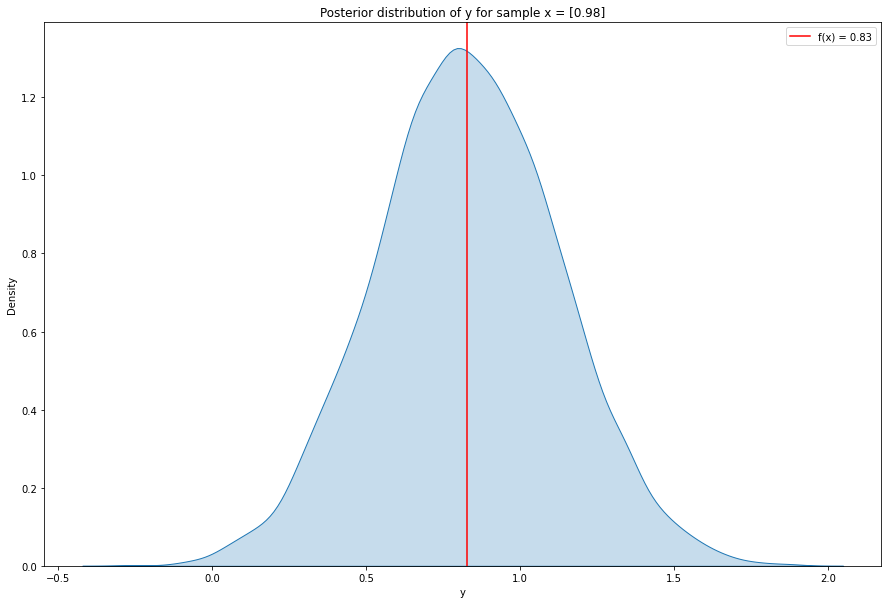

In [8]:
if True:
    if not os.path.exists(f"{BASE_DIR}/datasets"):
                os.mkdir(f"{BASE_DIR}/datasets")
    generate.gen(dataset_config, f"{BASE_DIR}/datasets")

In [9]:
(x_train, y_train), _, (x_test_in_domain, y_test_in_domain), (x_test_out_domain, y_test_out_domain) = load_data(f"{BASE_DIR}/datasets/{DATASET_NAME}", load_val=False)
x_test = torch.vstack((x_test_in_domain, x_test_out_domain))
y_test = torch.vstack((y_test_in_domain, y_test_out_domain))
print(x_test.shape, y_test.shape)

torch.Size([2000, 1]) torch.Size([2000, 1])


In [10]:
x_train.shape, y_train.shape

(torch.Size([1000, 1]), torch.Size([1000, 1]))

In [11]:
x_test[0], y_test[0]

(tensor([-3.9116]), tensor([1.3830]))

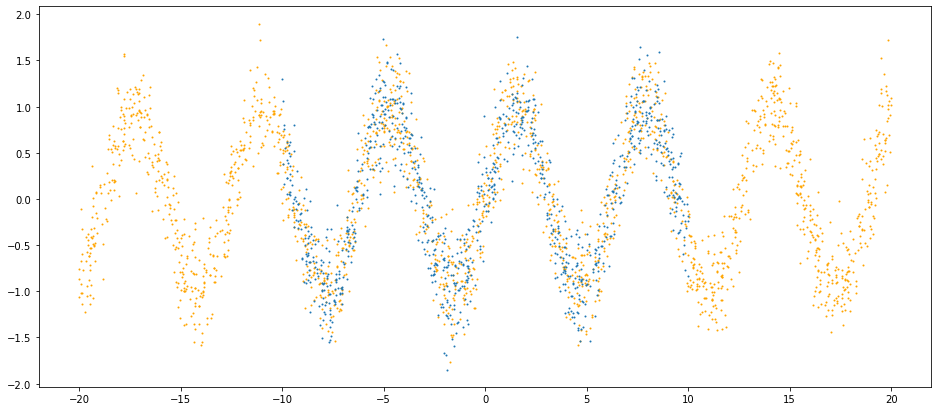

In [12]:
test_sort = torch.argsort(x_test.squeeze())
fig, ax = plt.subplots(figsize=(16, 7))
plt.scatter(x_test[test_sort].squeeze(), y_test[test_sort], color="orange", s=1)
plt.scatter(x_train.squeeze(), y_train, s=1)


In [14]:
pyro.clear_param_store()

if True:
    if not os.path.exists(f"{BASE_DIR}/models"):
                os.mkdir(f"{BASE_DIR}/models")
    if not os.path.exists(f"{BASE_DIR}/results"):
                os.mkdir(f"{BASE_DIR}/results")
    train.train(config, dataset_config, f"{BASE_DIR}", reruns=config.getint("RERUNS"), device=config["DEVICE"], num_workers=1)

torch.Size([512, 1]) torch.Size([512, 1])
Sequential(
  (0): Linear(in_features=1, out_features=32, bias=True)
  (1): LeakyReLU(negative_slope=0.05)
  (2): Sequential(
    (0): Linear(in_features=32, out_features=32, bias=True)
    (1): LeakyReLU(negative_slope=0.05)
  )
  (3): Linear(in_features=32, out_features=1, bias=True)
)
Using device: cpu
===== Training profile tyxe-test-mcmc - 1 =====


Warmup [2]:   0%|                                                              | 0/70 [00:00, ?it/s]

Warmup [3]:   0%|                                                              | 0/70 [00:00, ?it/s]


Warmup [4]:   0%|                                                              | 0/70 [00:00, ?it/s]



Warmup [5]:   0%|                                                              | 0/70 [00:00, ?it/s]




Warmup [6]:   0%|                                                              | 0/70 [00:00, ?it/s]





Warmup [7]:   0%|                                                              | 0/70 [00:00, ?it/s]






Warmup [8]:   0%|                                                              | 0/70 [00:00, ?it/s]







Warmup [9]:   0%|                                                              | 0/70 [00:00, ?it/s]








Warmup [10]:   0%|                                                             | 0/70 [00:00, ?it/s]



Warmup [5]:   1%|▎                    | 1/70 [00:00,

Warmup [1]:  17%|███▍                | 12/70 [00:04,  2.63it/s, step size=1.02e-05, acc. prob=0.692]





Sample [7]:  46%|█████████▏          | 32/70 [00:04,  7.71it/s, step size=8.93e-03, acc. prob=0.000]





Sample [7]:  47%|█████████▍          | 33/70 [00:05,  5.95it/s, step size=8.93e-03, acc. prob=0.000]








Warmup [10]:  10%|██                  | 7/70 [00:05,  1.09it/s, step size=8.54e-05, acc. prob=0.710]





Sample [2]:  36%|███████▏            | 25/70 [00:05,  2.84it/s, step size=5.32e-03, acc. prob=1.000]





Sample [7]:  54%|██████████▊         | 38/70 [00:05, 10.78it/s, step size=8.93e-03, acc. prob=0.000]







Warmup [9]:  16%|███▏                | 11/70 [00:05,  1.74it/s, step size=4.88e-05, acc. prob=0.727]





Sample [2]:  37%|███████▍            | 26/70 [00:05,  2.90it/s, step size=5.32e-03, acc. prob=1.000]


Warmup [4]:  23%|████▌               | 16/70 [00:05,  1.97it/s, step size=5.19e-05, acc. prob=0.750]







Warmup [9]:  17%|███▍                | 12/

Sample [9]:  43%|████████▌           | 30/70 [00:12,  5.85it/s, step size=3.65e-03, acc. prob=0.075]







Sample [9]:  46%|█████████▏          | 32/70 [00:12,  6.74it/s, step size=3.65e-03, acc. prob=0.062]







Sample [2]:  47%|█████████▍          | 33/70 [00:13,  1.52s/it, step size=5.32e-03, acc. prob=0.925]







Sample [9]:  51%|██████████▎         | 36/70 [00:13,  6.34it/s, step size=3.65e-03, acc. prob=0.047]







Sample [9]:  53%|██████████▌         | 37/70 [00:13,  5.90it/s, step size=3.65e-03, acc. prob=0.044]







Sample [9]:  54%|██████████▊         | 38/70 [00:13,  6.09it/s, step size=3.65e-03, acc. prob=0.041]







Sample [9]:  56%|███████████▏        | 39/70 [00:14,  4.83it/s, step size=3.65e-03, acc. prob=0.057]







Sample [9]:  57%|███████████▍        | 40/70 [00:14,  4.46it/s, step size=3.65e-03, acc. prob=0.054]







Sample [9]:  59%|███████████▋        | 41/70 [00:14,  3.99it/s, step size=3.65e-03, acc. prob=0.051]







Sample [9]:  60%|███████████

Sample [3]:  43%|████████▌           | 30/70 [00:59,  2.56it/s, step size=1.83e-02, acc. prob=0.000]

Sample [3]:  46%|█████████▏          | 32/70 [01:00,  3.47it/s, step size=1.83e-02, acc. prob=0.000]

Sample [3]:  49%|█████████▋          | 34/70 [01:00,  4.62it/s, step size=1.83e-02, acc. prob=0.000]

Sample [3]:  57%|███████████▍        | 40/70 [01:00,  9.40it/s, step size=1.83e-02, acc. prob=0.000]

Sample [3]:  64%|████████████▊       | 45/70 [01:00, 13.89it/s, step size=1.83e-02, acc. prob=0.000]

Sample [3]:  74%|██████████████▊     | 52/70 [01:00, 21.25it/s, step size=1.83e-02, acc. prob=0.000]

Sample [3]:  81%|████████████████▎   | 57/70 [01:00, 25.43it/s, step size=1.83e-02, acc. prob=0.000]

Sample [3]:  90%|██████████████████  | 63/70 [01:00, 31.29it/s, step size=1.83e-02, acc. prob=0.000]

Sample [3]:  97%|███████████████████▍| 68/70 [01:00, 34.89it/s, step size=1.83e-02, acc. prob=0.000]



Warmup [5]:  23%|████▌               | 16/70 [01:06, 11.32s/it, step size=3.06e-

Sample [2]:  57%|███████████▍        | 40/70 [04:23, 30.78s/it, step size=5.32e-03, acc. prob=0.836]






Sample [8]:  30%|██████              | 21/70 [04:29, 19.54s/it, step size=9.46e-04, acc. prob=0.917]




Sample [6]:  43%|████████▌           | 30/70 [04:37, 23.45s/it, step size=3.96e-03, acc. prob=0.826]








Warmup [10]:  26%|████▉              | 18/70 [04:46, 28.67s/it, step size=1.35e-02, acc. prob=0.781]








Sample [10]:  27%|█████▏             | 19/70 [04:46, 28.67s/it, step size=4.69e-03, acc. prob=0.740]








Sample [10]:  30%|█████▋             | 21/70 [04:46, 12.60s/it, step size=4.69e-03, acc. prob=0.000]








Sample [10]:  34%|██████▌            | 24/70 [04:46,  7.01s/it, step size=4.69e-03, acc. prob=0.000]








Sample [10]:  41%|███████▊           | 29/70 [04:46,  3.42s/it, step size=4.69e-03, acc. prob=0.000]








Sample [10]:  51%|█████████▊         | 36/70 [04:46,  1.69s/it, step size=4.69e-03, acc. prob=0.023]








Sample [10]:  59%|███████

Sample [2]:  79%|███████████████▋    | 55/70 [10:08, 23.15s/it, step size=5.32e-03, acc. prob=0.840]






Sample [8]:  56%|███████████▏        | 39/70 [10:19, 20.59s/it, step size=9.46e-04, acc. prob=0.699]




Sample [2]:  80%|████████████████    | 56/70 [10:37, 25.04s/it, step size=5.32e-03, acc. prob=0.832]




Sample [6]:  74%|██████████████▊     | 52/70 [10:45, 18.47s/it, step size=3.96e-03, acc. prob=0.844]






Sample [8]:  57%|███████████▍        | 40/70 [10:46, 22.36s/it, step size=9.46e-04, acc. prob=0.711]






Sample [8]:  59%|███████████▋        | 41/70 [11:06, 21.55s/it, step size=9.46e-04, acc. prob=0.724]




Sample [2]:  81%|████████████████▎   | 57/70 [11:06, 26.14s/it, step size=5.32e-03, acc. prob=0.836]




Sample [6]:  77%|███████████████▍    | 54/70 [11:23, 18.71s/it, step size=3.96e-03, acc. prob=0.853]






Sample [2]:  83%|████████████████▌   | 58/70 [11:29, 25.37s/it, step size=5.32e-03, acc. prob=0.839]






Sample [8]:  61%|████████████▎       | 43/70 

Sample [10]: 100%|███████████████████| 70/70 [16:40, 14.29s/it, step size=4.69e-03, acc. prob=0.012]


Training finished in 0:16:40.805472 seconds
Saved MCMC samples to ../tests/sanity_check_mcmc/models/tyxe-test-mcmc/checkpoint_1.pt
File Size is 2.2002973556518555 MB


In [13]:
bnn = train.make_inference_model(config, dataset_config, device=config["DEVICE"])
bnn = train.load_bnn(bnn, config, load_path=f"{BASE_DIR}/models/{NAME}/checkpoint_1.pt", device=config["DEVICE"])

Sequential(
  (0): Linear(in_features=1, out_features=32, bias=True)
  (1): LeakyReLU(negative_slope=0.05)
  (2): Sequential(
    (0): Linear(in_features=32, out_features=32, bias=True)
    (1): LeakyReLU(negative_slope=0.05)
  )
  (3): Linear(in_features=32, out_features=1, bias=True)
)


FileNotFoundError: [Errno 2] No such file or directory: '../tests/sanity_check_mcmc/models/tyxe-test-mcmc/checkpoint_1.pt'

In [23]:
import pickle
with open(f"{BASE_DIR}/results/{NAME}/mcmc_diagnostics_1.pkl", "rb") as f:
    diag = pickle.load(f)

In [26]:
diag

{'net.0.bias': OrderedDict([('n_eff',
               tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                       nan, nan, nan, nan, nan, nan, nan, nan])),
              ('r_hat',
               tensor([15.0419, 26.0100, 17.5474, 22.9120, 50.5316, 23.2000, 22.1034, 19.9584,
                       17.2327, 11.6545, 36.8448, 28.7550, 41.2272, 17.7659, 16.5835, 43.5040,
                       30.0200, 38.0808, 13.1412, 18.0014, 17.1579, 24.4427, 20.8880, 19.4842,
                       21.7673, 33.1608, 20.0807, 25.9299, 21.5662, 20.2765, 16.3249, 22.7845]))]),
 'net.0.weight': OrderedDict([('n_eff',
               tensor([[nan],
                       [nan],
                       [nan],
                       [nan],
                       [nan],
                       [nan],
                       [nan],
                       [nan],
                       [nan],
                       [nan],
    

In [25]:
test_sort = torch.argsort(x_test.squeeze())
preds = bnn.predict(x_test[test_sort].to(config["DEVICE"]), num_predictions=1000, aggregate=True)

means, stds = preds
means, stds = means.detach().cpu(), stds.detach().cpu()

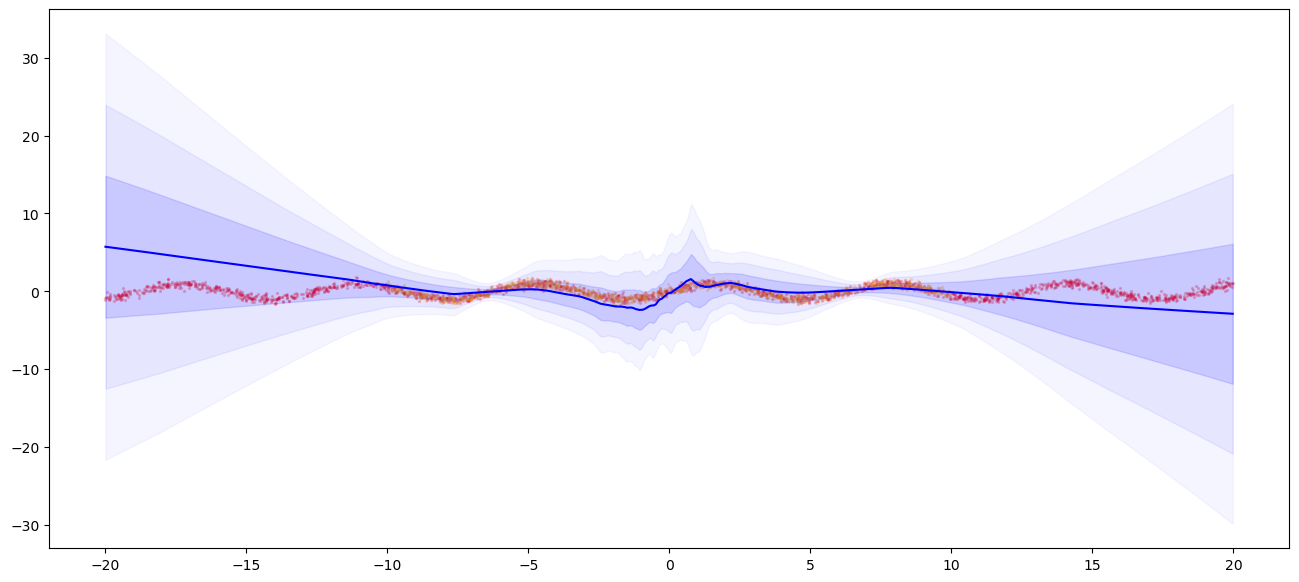

In [26]:
fig, ax = plt.subplots(figsize=(16, 7))
plt.scatter(x_test[test_sort].squeeze(), y_test[test_sort], color="red", s=2, alpha=0.2)
plt.scatter(x_train, y_train, color="orange", s=2, alpha=0.2)
plt.plot(x_test[test_sort], means, color="blue")
#plt.fill_between(x_test[test_sort].squeeze(), minimum.squeeze(), maximum.squeeze(), alpha=0.1, color="blue")
for c in range(1, 4):
    plt.fill_between(x_test[test_sort].squeeze(), (means - c * stds).squeeze(), (means + c * stds).squeeze(), alpha=(1.5/c) * 0.08, color="blue")

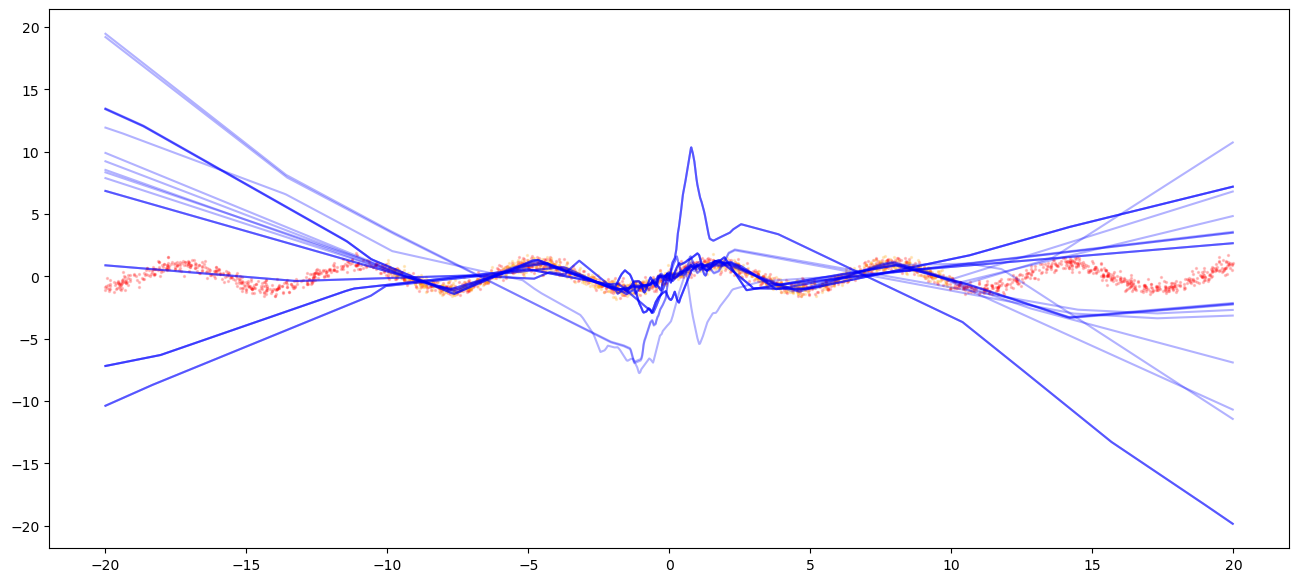

In [18]:
sampled_predictions = bnn.predict(x_test[test_sort].to(config["DEVICE"]), num_predictions=25, aggregate=False)
sampled_predictions = sampled_predictions.detach().cpu()
fig, ax = plt.subplots(figsize=(16, 7))
plt.scatter(x_test[test_sort].squeeze(), y_test[test_sort], color="red", s=2, alpha=0.2)
plt.scatter(x_train, y_train, color="orange", s=2, alpha=0.2)
for yhat in sampled_predictions:
    plt.plot(x_test[test_sort], yhat, color="blue", alpha=0.3)

In [19]:
if not os.path.exists(f"{BASE_DIR}/results"):
            os.mkdir(f"{BASE_DIR}/results")           
eval.eval(config, dataset_config, f"{BASE_DIR}", bnn=None, reruns=config.getint("RERUNS"), device=config["DEVICE"])

data samples:  (1000, 1000)
Sequential(
  (0): Linear(in_features=1, out_features=32, bias=True)
  (1): LeakyReLU(negative_slope=0.05)
  (2): Sequential(
    (0): Linear(in_features=32, out_features=32, bias=True)
    (1): LeakyReLU(negative_slope=0.05)
  )
  (3): Linear(in_features=32, out_features=1, bias=True)
)
init mcmc


Sample: 100%|██████████████████████████| 2/2 [00:00, 28.37it/s, step size=4.88e-04, acc. prob=1.000]

Loaded MCMC samples from ../tests/sanity_check_mcmc/models/tyxe-test-mcmc/checkpoint_1.pt
using device: cpu
====== evaluating profile tyxe-test-mcmc - 1 ======


pred samples:  (1000, 1000)
Evaluating train...
Evaluating test...
Evaluating in_domain...
Evaluating out_domain...
Eval done in 0:00:09.738557


In [20]:
profiles= ["tyxe-test-mcmc"]

colors = ["green"]

names = [configs[p]["NAME"] for p in profiles]

In [21]:
from IPython.display import display, HTML
import json

train_stats = {}
for p in profiles:
    name = configs[p]["NAME"]
    with open(f"{BASE_DIR}/results/{name}/train_stats_1.json", "r") as f:
        train_stats[name] = json.load(f)

results = {}
for p in profiles:
    name = configs[p]["NAME"]
    with open(f"{BASE_DIR}/results/{name}/results_1.json", "r") as f:
        results[name] = json.load(f)

# Load posterior samples
posterior_samples = {}
for p in profiles:
    name = configs[p]["NAME"]
    # Load posterior samples
    train = np.load(f"{BASE_DIR}/results/{name}/posterior-samples/train_samples_1.npy")
    test = np.load(f"{BASE_DIR}/results/{name}/posterior-samples/test_samples_1.npy")
    test_in_domain = np.load(f"{BASE_DIR}/results/{name}/posterior-samples/test_in_domain_samples_1.npy")
    test_out_domain = np.load(f"{BASE_DIR}/results/{name}/posterior-samples/test_out_domain_samples_1.npy")

    posterior_samples[name] = {
        "train": train,
        "test": test,
        "test_in_domain": test_in_domain,
        "test_out_domain": test_out_domain
    }

In [22]:
#Generate table for rmse
table = pd.DataFrame(columns=["Name", "Likelihood_std", "Train RMSE", "In domain RMSE", "Out domain RMSE"])
for p in profiles:
    name = configs[p]["NAME"]
    table = table.append({
        "Name": name,
        "Train RMSE": results[name]["train"]["error"]["rmse"],
        "In domain RMSE": results[name]["in_domain"]["error"]["rmse"],
        "Out domain RMSE": results[name]["out_domain"]["error"]["rmse"],
        "Likelihood_std": train_stats[name]["likelihood"]["mean"]
    }, ignore_index=True)

display(table)
print()

#Generate table for mae
table = pd.DataFrame(columns=["Name", "Likelihood_std", "Train MAE", "In domain MAE", "Out domain MAE"])
for p in profiles:
    name = configs[p]["NAME"]
    table = table.append({
        "Name": name,
        "Train MAE": results[name]["train"]["error"]["mae"],
        "In domain MAE": results[name]["in_domain"]["error"]["mae"],
        "Out domain MAE": results[name]["out_domain"]["error"]["mae"],
        "Likelihood_std": train_stats[name]["likelihood"]["mean"]
    }, ignore_index=True)

display(table)
print()

#Generate table for log likelihood
table = pd.DataFrame(columns=["Name", "Likelihood_std", "Train log likelihood", "In domain log likelihood", "Out domain log likelihood"])
for p in profiles:
    name = configs[p]["NAME"]
    table = table.append({
        "Name": name,
        "Train log likelihood": results[name]["train"]["error"]["loglikelihood"],
        "In domain log likelihood": results[name]["in_domain"]["error"]["loglikelihood"],
        "Out domain log likelihood": results[name]["out_domain"]["error"]["loglikelihood"],
        "Likelihood_std": train_stats[name]["likelihood"]["mean"]
    }, ignore_index=True)

display(table)

/tmp/ipykernel_1678336/602405480.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({


,Name,Likelihood_std,Train RMSE,In domain RMSE,Out domain RMSE
0,tyxe-test-mcmc,0.3,0.733166,0.737107,2.920273


/tmp/ipykernel_1678336/602405480.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({


,Name,Likelihood_std,Train MAE,In domain MAE,Out domain MAE
0,tyxe-test-mcmc,0.3,0.61243,0.619595,2.488045


/tmp/ipykernel_1678336/602405480.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({


,Name,Likelihood_std,Train log likelihood,In domain log likelihood,Out domain log likelihood
0,tyxe-test-mcmc,0.3,-1.250809,-1.271825,-2.563502


In [23]:
name1 = configs[profiles[0]]["NAME"]
data_samples = {
    "train_x": np.load(f"{BASE_DIR}/results/{name1}/data-samples/train_x.npy"),
    "test_in_domain_x": np.load(f"{BASE_DIR}/results/{name1}/data-samples/test_in_domain_x.npy"),
    "test_out_domain_x": np.load(f"{BASE_DIR}/results/{name1}/data-samples/test_out_domain_x.npy"),
    #"test_x": np.load(f"{BASE_DIR}/results/{name1}/data-samples/test_x.npy"),
    "train_dist_samples": np.load(f"{BASE_DIR}/results/{name1}/data-samples/train_dist_samples.npy"),
    "test_in_domain_dist_samples": np.load(f"{BASE_DIR}/results/{name1}/data-samples/test_in_domain_dist_samples.npy"),
    "test_out_domain_dist_samples": np.load(f"{BASE_DIR}/results/{name1}/data-samples/test_out_domain_dist_samples.npy"),
    #"test_dist_samples": np.load(f"{BASE_DIR}/results/{name1}/data-samples/test_dist_samples.npy"),
}

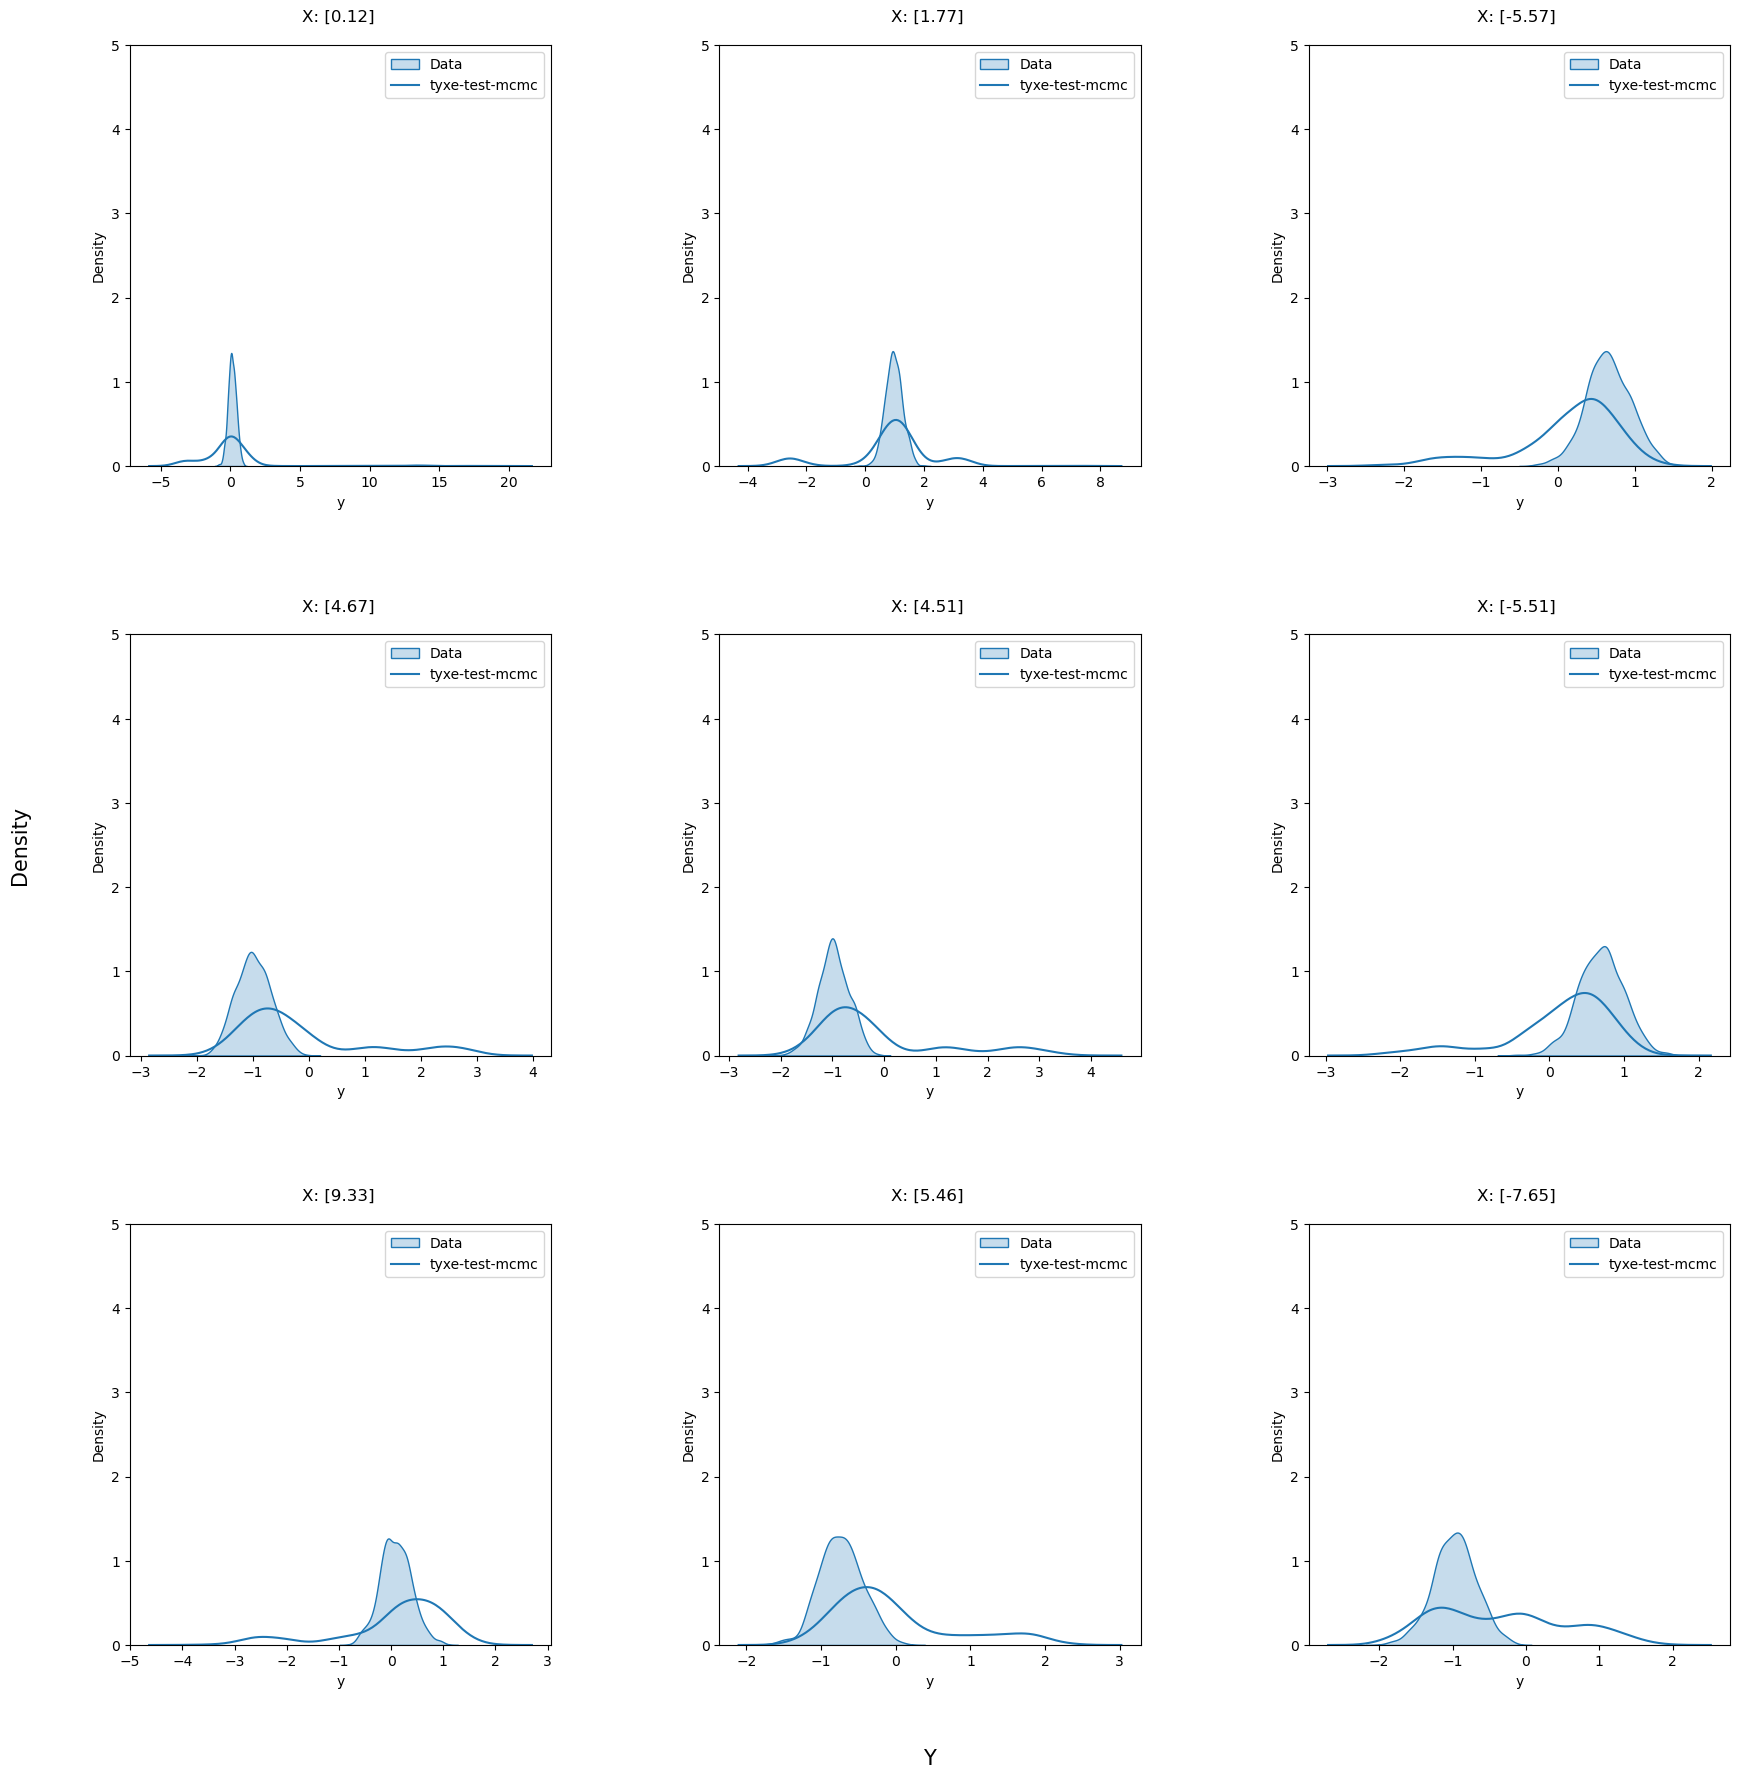

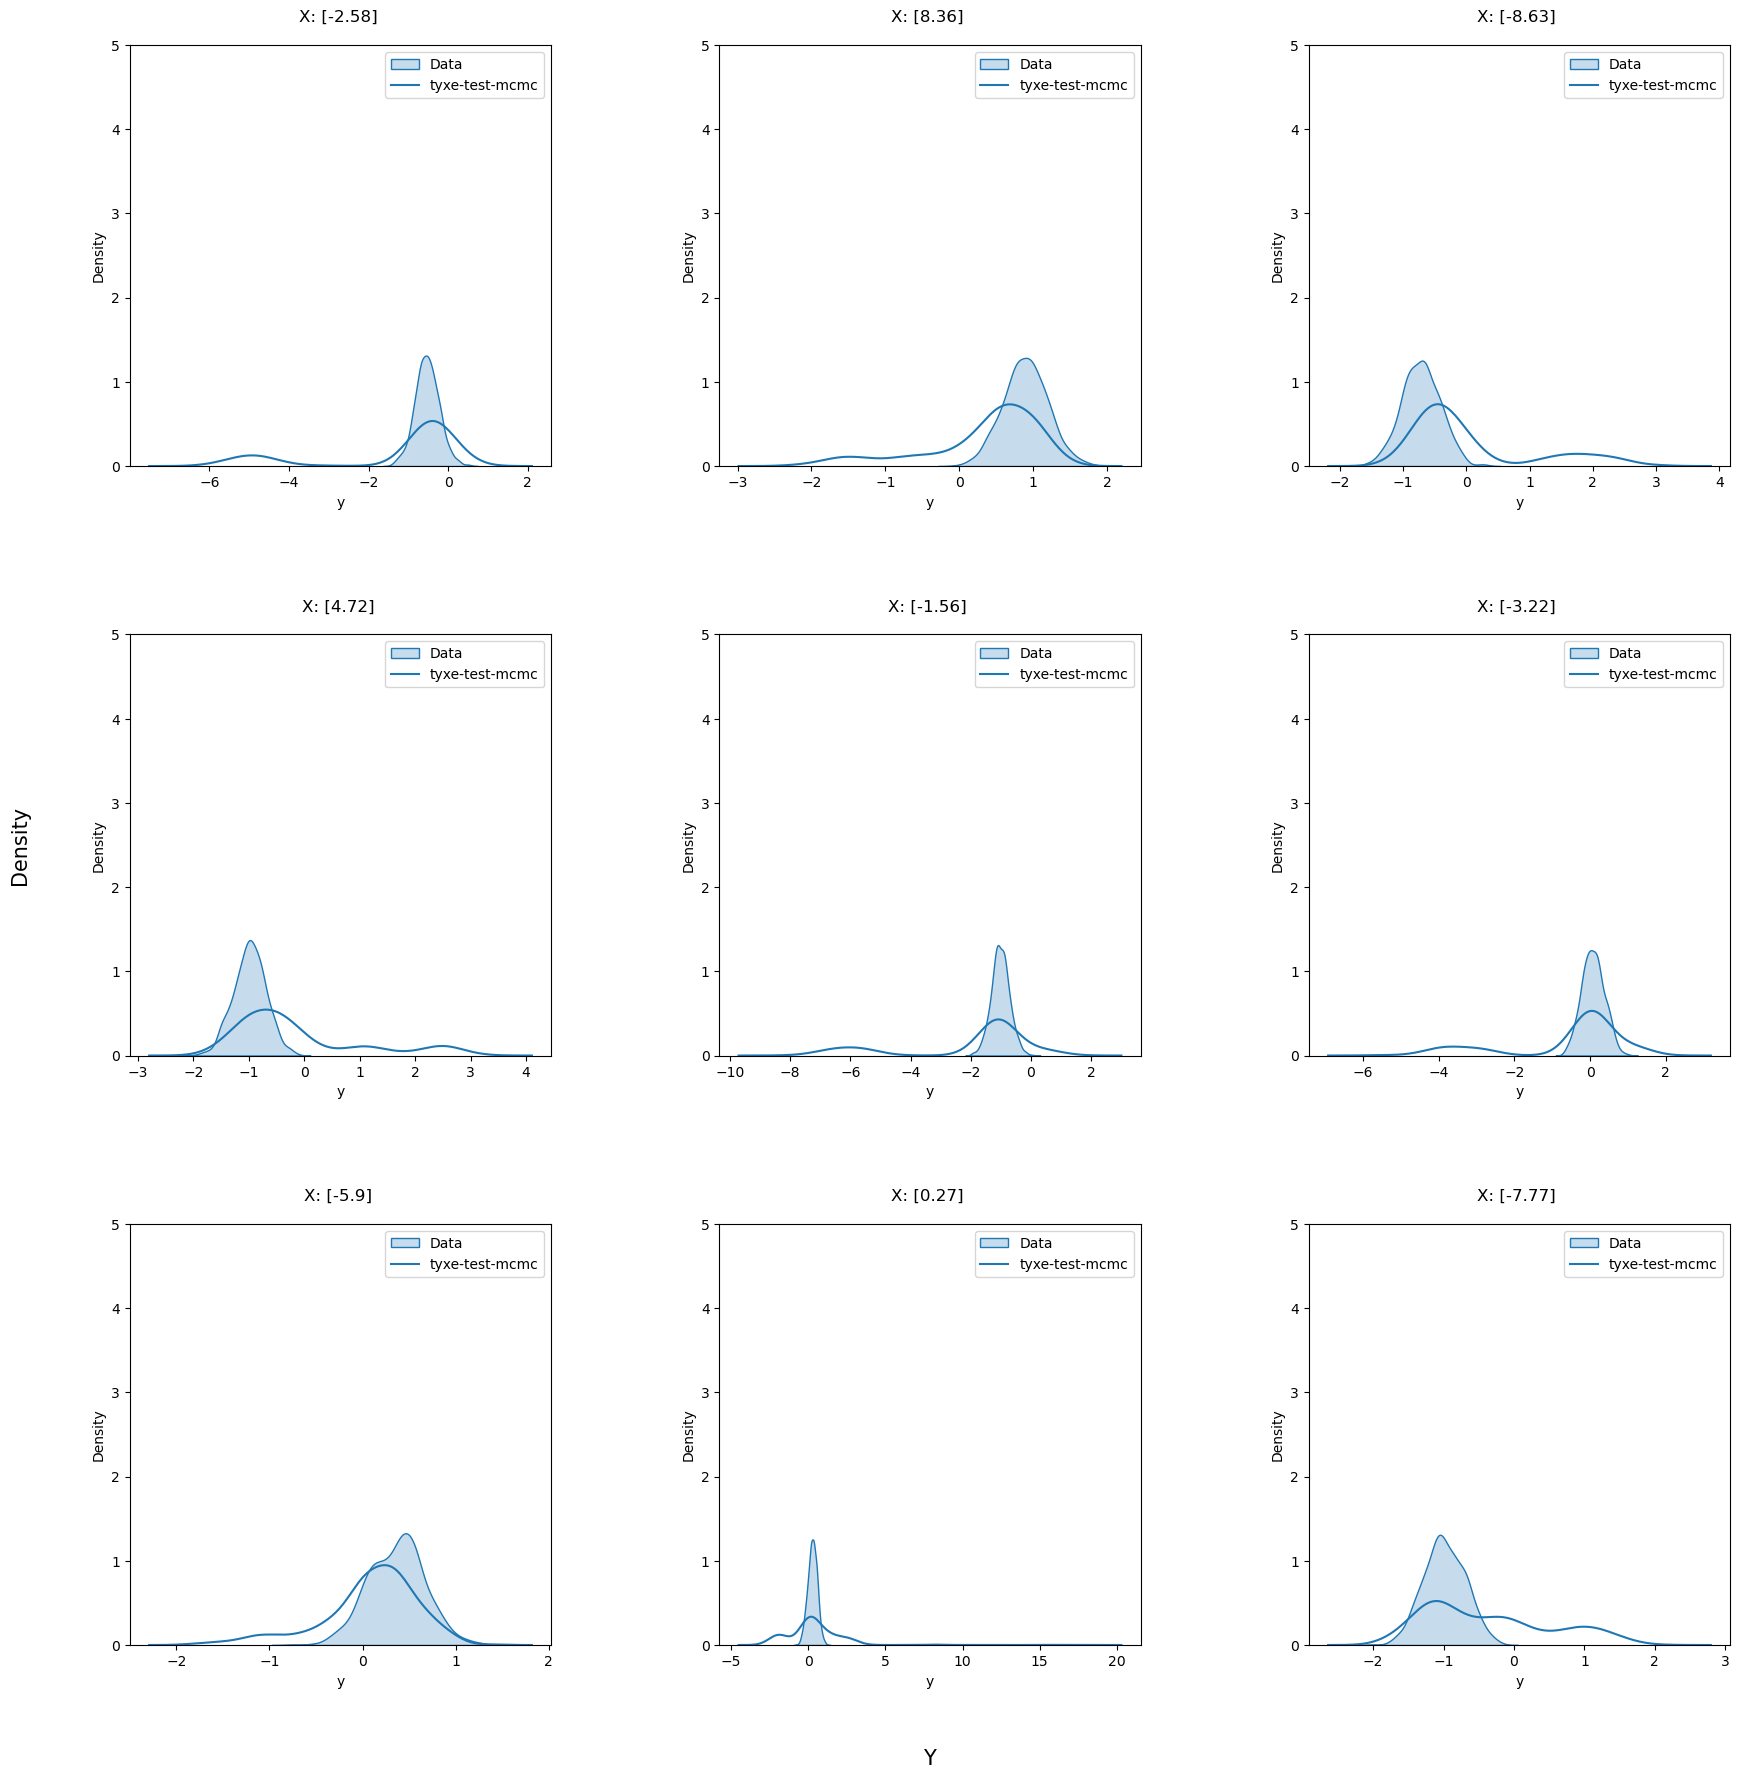

In [24]:

fig, axs = plt.subplots(3, 3, figsize=(20, 20))
axs = axs.flatten()
fig.tight_layout()
#fig.suptitle(title, fontsize=15)
fig.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9, hspace=0.4, wspace=0.4)
fig.text(0.5, 0.04, 'Y', ha='center', fontsize=15)
fig.text(0.04, 0.5, 'Density', va='center', rotation='vertical', fontsize=15)

for i, ax in enumerate(axs):
    labels = [configs[p]["NAME"] for p in profiles]
    x_samp = data_samples["train_x"][i]
    train_samp = data_samples["train_dist_samples"][:, i]
    pred_train_samples = [posterior_samples[p]["train"][:, i] for p in profiles]
    plots.plot_comparisons(pred_train_samples, train_samp, labels=labels, x_sample=x_samp, ax=ax)   
    ax.set_ylim([0, 5])

plt.show()

fig, axs = plt.subplots(3, 3, figsize=(20, 20))
axs = axs.flatten()
fig.tight_layout()
#fig.suptitle(title, fontsize=15)
fig.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9, hspace=0.4, wspace=0.4)
fig.text(0.5, 0.04, 'Y', ha='center', fontsize=15)
fig.text(0.04, 0.5, 'Density', va='center', rotation='vertical', fontsize=15)

for i, ax in enumerate(axs):
    labels = [configs[p]["NAME"] for p in profiles]
    x_samp = data_samples["test_in_domain_x"][i]
    train_samp = data_samples["test_in_domain_dist_samples"][:, i]
    pred_train_samples = [posterior_samples[p]["test_in_domain"][:, i] for p in profiles]
    plots.plot_comparisons(pred_train_samples, train_samp, labels=labels, x_sample=x_samp, ax=ax)   
    ax.set_ylim([0, 5])

plt.show()